AttributeError: 'str' object has no attribute 'TXT'

C:\Users\savio\AppData\Local\Temp\ipykernel_16580\1819746490.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Data'] = pd.to_datetime(df['Data'], format='%Y%m%d')
C:\Users\savio\AppData\Local\Temp\ipykernel_16580\1819746490.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Preco_Fechamento_Suavizado'] = df['Preco_Fechamento'].rolling(window=window_size).mean()
c:\Users\savio\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsup

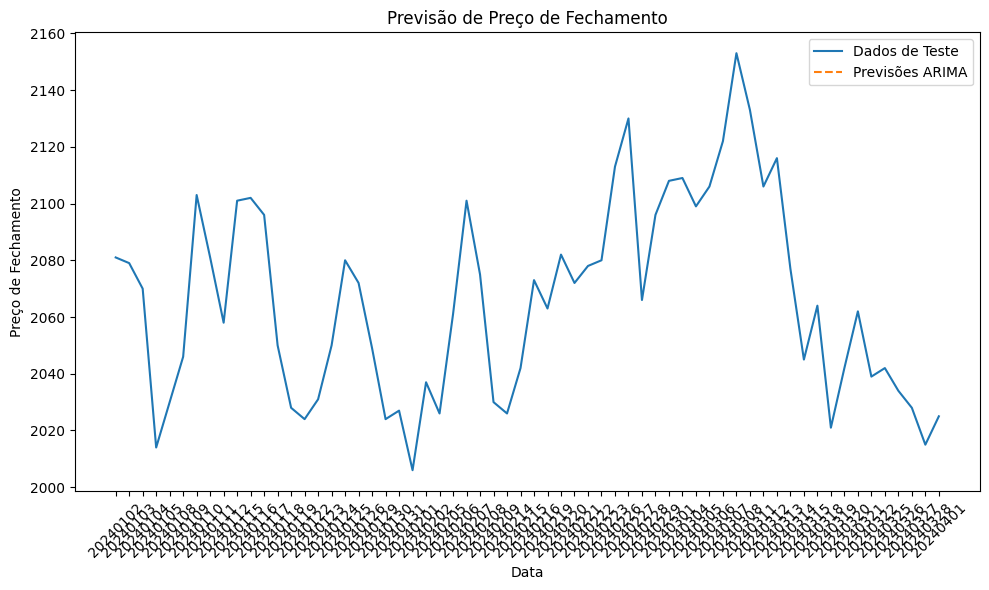

Previsão de Preço de Fechamento para 2024:
         Preco_Fechamento_Predito
Data                             
20240102                      NaN
20240103                      NaN
20240104                      NaN
20240105                      NaN
20240108                      NaN
...                           ...
20240325                      NaN
20240326                      NaN
20240327                      NaN
20240328                      NaN
20240401                      NaN

[62 rows x 1 columns]


In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Define os nomes das colunas e as larguras de cada campo
colspecs = [(2, 10), (10, 22), (56, 69), (82, 95)]
names = ['Data', 'Codigo', 'Preco_Abertura', 'Preco_Fechamento']

# Função para carregar dados e aplicar pré-processamento
def load_data(file_path):
    df = pd.read_fwf(file_path, colspecs=colspecs, names=names, header=None)
    return df

# Função para filtrar dados pela ação desejada
def filter_data(df, codigo):
    return df[df['Codigo'].str.endswith(codigo)]

# Função para converter a coluna 'Data' para datetime
def convert_to_datetime(df):
    df['Data'] = pd.to_datetime(df['Data'], format='%Y%m%d')
    return df

# Função para suavizar os dados usando média móvel
def smooth_data(df, window_size):
    df['Preco_Fechamento_Suavizado'] = df['Preco_Fechamento'].rolling(window=window_size).mean()
    return df.dropna()  # Remove linhas com valores ausentes após suavização

# Função para ajustar o modelo ARIMA aos dados de treinamento
def fit_arima_model(train_data, order):
    model = ARIMA(train_data['Preco_Fechamento_Suavizado'], order=order)
    fit_model = model.fit()
    return fit_model

# Função para fazer previsões com o modelo ARIMA
def forecast_arima_model(model, test_data):
    forecast = model.forecast(steps=len(test_data))
    forecast_index = test_data['Data']
    forecast_df = pd.DataFrame(forecast, index=forecast_index, columns=['Preco_Fechamento_Predito'])
    return forecast_df

# Função para plotar gráfico de previsões
def plot_forecast(test_data, forecast_data):
    plt.figure(figsize=(10, 6))
    plt.plot(test_data['Data'], test_data['Preco_Fechamento'], label='Dados de Teste')
    plt.plot(forecast_data.index, forecast_data['Preco_Fechamento_Predito'], label='Previsões ARIMA', linestyle='--')
    plt.title('Previsão de Preço de Fechamento')
    plt.xlabel('Data')
    plt.ylabel('Preço de Fechamento')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Carrega dados de treinamento
df_train_2022 = load_data('COTAHIST_A2022.TXT')
df_train_2023 = load_data('COTAHIST_A2023.TXT')

# Concatena dados de treinamento
df_train = pd.concat([df_train_2022, df_train_2023])

# Carrega dados de teste
df_test = load_data('COTAHIST_A2024.TXT')

# Filtra dados para a ação desejada (NEOE3)
neoe3_df_train = filter_data(df_train, 'NEOE3')
neoe3_df_test = filter_data(df_test, 'NEOE3')

# Aplica pré-processamento aos dados
neoe3_df_train = convert_to_datetime(neoe3_df_train)
neoe3_df_train = smooth_data(neoe3_df_train, 7)

# Ajusta modelo ARIMA aos dados de treinamento
model = fit_arima_model(neoe3_df_train, order=(2, 1, 2))

# Faz previsões com o modelo ARIMA para o ano de 2024
forecast_df = forecast_arima_model(model, neoe3_df_test)

# Plota gráfico de previsões
plot_forecast(neoe3_df_test, forecast_df)

# Mostra a previsão para o ano de 2024
print(f"Previsão de Preço de Fechamento para 2024:\n{forecast_df}")


In [24]:
# Teste da função load_data
file_path = 'COTAHIST_A2022.TXT'
loaded_data = load_data(file_path)
print("Dados carregados:")
print(loaded_data.head())

Dados carregados:
       Data        Codigo  Preco_Abertura  Preco_Fechamento
0  COTAHIST  .2022BOVESPA             NaN               NaN
1  20220103       02GNDI3          5970.0            5727.0
2  20220103       02ABEV3          1542.0            1515.0
3  20220103      02MODL11          1080.0            1071.0
4  20220103       02TASA4          2500.0            2428.0


In [25]:
# Teste da função filter_data
codigo = 'NEOE3'
filtered_data = filter_data(loaded_data, codigo)
print("\nDados filtrados para o código NEOE3:")
print(filtered_data.head())



Dados filtrados para o código NEOE3:
          Data   Codigo  Preco_Abertura  Preco_Fechamento
293   20220103  02NEOE3          1602.0            1573.0
2396  20220119  02NEOE3          1546.0            1546.0
2430  20220221  02NEOE3          1611.0            1580.0
5769  20220204  02NEOE3          1650.0            1603.0
6920  20220104  02NEOE3          1584.0            1555.0


In [26]:
# Teste da função convert_to_datetime
converted_data = convert_to_datetime(filtered_data)
print("\nDados com datas convertidas:")
print(converted_data.head())



Dados com datas convertidas:
           Data   Codigo  Preco_Abertura  Preco_Fechamento
293  2022-01-03  02NEOE3          1602.0            1573.0
2396 2022-01-19  02NEOE3          1546.0            1546.0
2430 2022-02-21  02NEOE3          1611.0            1580.0
5769 2022-02-04  02NEOE3          1650.0            1603.0
6920 2022-01-04  02NEOE3          1584.0            1555.0


C:\Users\savio\AppData\Local\Temp\ipykernel_16580\1819746490.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Data'] = pd.to_datetime(df['Data'], format='%Y%m%d')


In [27]:
# Teste da função smooth_data
window_size = 7
smoothed_data = smooth_data(converted_data, window_size)
print("\nDados suavizados:")
print(smoothed_data.head())



Dados suavizados:
            Data   Codigo  Preco_Abertura  Preco_Fechamento  \
9034  2022-01-20  02NEOE3          1556.0            1556.0   
12308 2022-02-07  02NEOE3          1608.0            1576.0   
13725 2022-01-05  02NEOE3          1552.0            1525.0   
15317 2022-02-23  02NEOE3          1609.0            1597.0   
15485 2022-01-21  02NEOE3          1571.0            1556.0   

       Preco_Fechamento_Suavizado  
9034                  1571.428571  
12308                 1571.857143  
13725                 1568.857143  
15317                 1571.285714  
15485                 1564.571429  


C:\Users\savio\AppData\Local\Temp\ipykernel_16580\1819746490.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Preco_Fechamento_Suavizado'] = df['Preco_Fechamento'].rolling(window=window_size).mean()


In [28]:
# Teste da função fit_arima_model
train_data = smoothed_data  # Usaremos os dados suavizados para treinamento
order = (2, 1, 2)
arima_model = fit_arima_model(train_data, order)
print("\nModelo ARIMA ajustado:")
print(arima_model.summary())


c:\Users\savio\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\savio\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\savio\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)



Modelo ARIMA ajustado:
                                   SARIMAX Results                                    
Dep. Variable:     Preco_Fechamento_Suavizado   No. Observations:                  244
Model:                         ARIMA(2, 1, 2)   Log Likelihood                -982.648
Date:                        Tue, 02 Apr 2024   AIC                           1975.296
Time:                                18:34:01   BIC                           1992.761
Sample:                                     0   HQIC                          1982.331
                                        - 244                                         
Covariance Type:                          opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9297      0.054     17.317      0.000       0.824       1.035
ar.L2         -0.4325      0.055     -7.840

c:\Users\savio\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [29]:
# Verificando os dados disponíveis até o ano de 2023
print("Dados disponíveis até o ano de 2023:")
print(df_train['Data'].min(), " - ", df_train['Data'].max())


Dados disponíveis até o ano de 2023:
20220103  -  COTAHIST


c:\Users\savio\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\savio\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\savio\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)



Resumo do Modelo ARIMA:
                                   SARIMAX Results                                    
Dep. Variable:     Preco_Fechamento_Suavizado   No. Observations:                  492
Model:                         ARIMA(2, 1, 2)   Log Likelihood               -1877.048
Date:                        Tue, 02 Apr 2024   AIC                           3764.096
Time:                                18:18:18   BIC                           3785.079
Sample:                                     0   HQIC                          3772.336
                                        - 492                                         
Covariance Type:                          opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.1073      0.031     35.584      0.000       1.046       1.168
ar.L2         -0.4597      0.030    -15.26

c:\Users\savio\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
